### ML, Data Analysis
#### Discrete random variables and their distribution functions
In this notebook, we talk about discrete random variables with an example from *Bernoulli probability function*.
<br>**Definition:** *Random variables* are *discrete* when their range is **finitely countable** or **infinitely countable**. 
<br> **Reminder:** A set is *countable* if the number of its elements is not greater than that of the *natural numbers*. As a result, any finite set is a countable set.  
<br>**Contents:**
- Defining *sample space* of Bernoulli
- Defining the *random variable* of Bernoulli
- Bernoulli *probability (mass) function*
- Displaying Bernoulli probability function
- Computing and displaying *(cumulative) distribution function*
- Compute and then displaying *entropy* for Bernoulli with different values of parameter $p$
<hr>
https://github.com/ostad-ai/Machine-Learning
<br> Explanation: https://www.pinterest.com/HamedShahHosseini/Machine-Learning/background-knowledge

For **enumerations** in Python, see our repository for Python
<br> https://github.com/ostad-ai/Python-Everything

Here, we review discrete random variables for **Bernoulli probability (mass) function**.<br>
**Bernoulli** probability mass function with parameter $p$ is defined on the set of random variables {0,1} such that:<br>
$Bernoulli(0)=1-p$  <br>
$Bernoulli(1)=p$ 
<br> Bernoulli function appears in tossing a coin in which we get *heads* denoted by $X=1$ with probability $p$ and *tails* denoted by $X=0$ with probability $1-p$

In [1]:
# importing the required modules
from matplotlib import pyplot as plt
import numpy as np
from enum import Enum,auto

In [2]:
# defining the sample space for tossing a coin with two outcomes: tails and heads
class SampleSpace(Enum):
    TAILS=auto()
    HEADS=auto()

In [3]:
# defining a random variable for the outcomes of tossing a coin
def X(outcome):
    if outcome==SampleSpace.TAILS:
        return 0
    elif outcome==SampleSpace.HEADS:
        return 1

In [4]:
# Bernoulli probability (mass) function for random variable x and parameter p   
def Bernoulli(x,p=.5):
    if x==0: return 1-p
    elif x==1: return p
    else: return 0

In [5]:
# display the probability of outcomes based on Bernoulli with parameter p
p=.7
print(f'Bernoulli probabilities with parameter p={p}:')
for outcome in [SampleSpace.TAILS,SampleSpace.HEADS]:
    prob=Bernoulli(X(outcome),p)
    print(f'Probability of {outcome.name} is {prob:.5f}')

Bernoulli probabilities with parameter p=0.7:
Probability of TAILS is 0.30000
Probability of HEADS is 0.70000


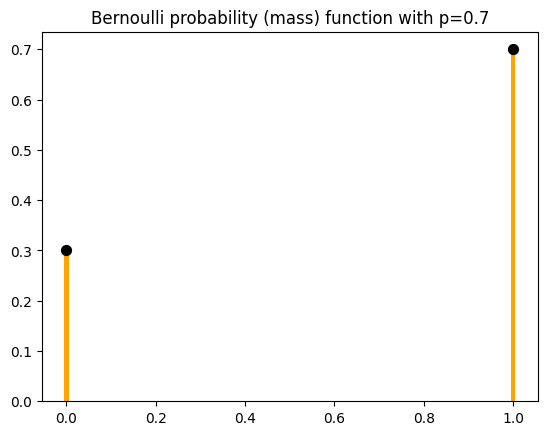

In [6]:
# displaying Bernoulli mass function with parameter p
xs,p=[0,1],.7
ys=[Bernoulli(x,p) for x in xs]
plt.bar(xs,ys,.01,color='orange')
plt.scatter(xs,ys,s=50,c='k')
plt.title(f'Bernoulli probability (mass) function with p={p}')
plt.show()

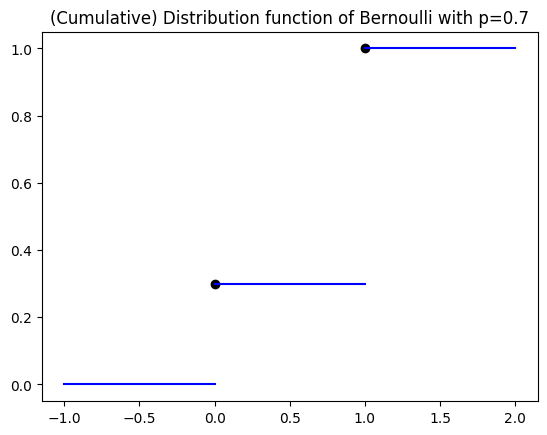

In [7]:
#compute, then display (cumulative) distribution function of Bernoulli with parameter p
xs,p,pmf=[0,1],.7,Bernoulli
#-------computing cdf
cdf=[]
for x in xs:
    if cdf:
        cdf.append(cdf[-1]+pmf(x,p))
    else:
        cdf.append(pmf(x,p))
#--- displaying cdf
for i in range(len(xs)+1):
    if i==0:
        x0=min(xs)-1; y=0
    else:
        x0=xs[i-1]; y=cdf[i-1]
    if i<len(xs):
        x1=xs[i]
    else:
        x1=max(xs)+1
    plt.plot([x0,x1],[y,y],'-',c='b')
    if i>0:
        plt.scatter(x0,y,c='k')
plt.title(f'(Cumulative) Distribution function of Bernoulli with p={p}')
plt.show()

Compute the entropy of Bernoulli with parameter $p$:<br>
$H(X)=-(1-p) \cdot log(1-p)- p\cdot log(p)$<br>
The base of logarithm is usually *e* or *2*.

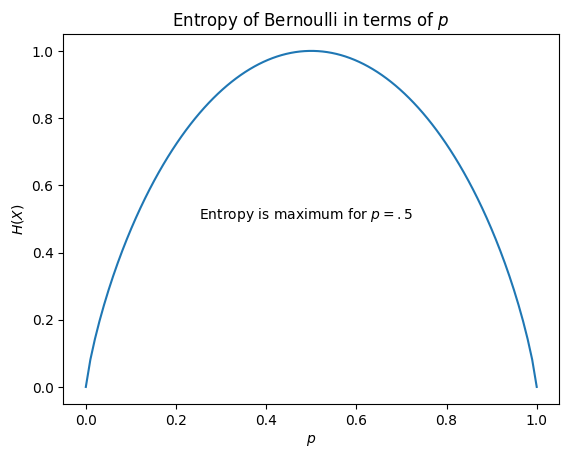

In [8]:
# entropy for Bernoulli witt parameter param, with base 2
def entropy(param,pmf=Bernoulli,S=SampleSpace):
    s=0
    for outcome in [S.TAILS,S.HEADS]:
        x=X(outcome)
        prob=pmf(x,param)
        if prob!=0:
            s-=prob*np.log2(prob)
    return s

#displaying the entropy of Bernoulli for p from zero to one
ps=np.linspace(0,1,100)
hs=[entropy(p) for p in ps]
plt.plot(ps,hs)
plt.title('Entropy of Bernoulli in terms of $p$')
plt.xlabel('$p$')
plt.ylabel('$H(X)$')
plt.text(.25,.5,'Entropy is maximum for $p=.5$')
plt.show()